In [2]:
import sys
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import random
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import time

In [3]:
# Load datasets
df = pd.read_csv('dataset1.csv', header = None)
dataset1 = df.values.tolist()
df = pd.read_csv('dataset2.csv', header = None)
dataset2 = df.values.tolist()

In [4]:
def plotGraph(x, fx, filename):
    plt.clf()
    plt.plot(x, fx,'-o', linewidth=3.0)
    plt.xlabel("Number of Clusters")
    plt.ylabel('Cost')
    plt.xlim(2, max(x))
    plt.ylim(0, max(fx)+200)
    plt.title("Number of Clusters vs. Cost")
    plt.savefig(filename  + '.png')
    plt.show()

In [5]:
def cost(clusters, centers):
    cost = 0
    for cluster, center in zip(clusters, centers):
        for datapoint in cluster:
            cost += (np.linalg.norm(list(np.array(datapoint) - np.array(center))))**2
    return cost

In [8]:
def create2DScatter(clusters, centers):
    colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
    fig = plt.figure(figsize = (10, 7))
    for cluster, c in zip(clusters, colors):
        plt.scatter([dataset[0] for dataset in cluster], [dataset[1] for dataset in cluster], color = c)    
    return plt.scatter([dataset[0] for dataset in centers], [dataset[1] for dataset in centers], color = 'k', marker = 'x',s = 80, linewidths=4)

In [7]:
def create3DScatter(clusters, centers):
    colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
    fig = plt.figure(figsize = (15, 10))
    # Add gridlines
    ax = plt.axes(projection ="3d") 
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)  
    ax.set_xlabel('X-axis', fontweight ='bold')  
    ax.set_ylabel('Y-axis', fontweight ='bold')  
    ax.set_zlabel('Z-axis', fontweight ='bold')
    ax.view_init(0, 90)
    ax.set_yticks([])
    for cluster, c in zip(clusters, colors):
        ax.scatter3D([dataset[0] for dataset in cluster], [dataset[1] for dataset in cluster], [dataset[2] for dataset in cluster], color = c)
    return ax.scatter3D([dataset[0] for dataset in centers], [dataset[1] for dataset in centers], [dataset[2] for dataset in centers], marker = 'x', color = 'k', s = 80)

In [9]:
# Lloyd's algorithm using Euclidean distance:
# Initialization methods:
# 1) uniform random intialization
# 2) K-means++ initialization 
def executeLloyd(dataset, k, initialization):
    if initialization == "uniform random":
        centers = random.sample(dataset, k)
    elif initialization == "k-means++":
        centers = random.sample(dataset, 1)
        for i in range(k-1):
            # Store distance of datapoints from last centriod
            distances = []
            for datapoint in dataset:
                dist = sys.maxsize
                # Compute the distance from the point to previously selected centers
                for center in centers:
                    temp = np.linalg.norm(list(np.array(datapoint) - np.array(center)))
                    dist = min(dist, temp) 
                distances.append(dist)  
            maxDistance = max(distances)
            centers.append(dataset[distances.index(maxDistance)])                     
    else:
        raise Exception("Invalid initialization type")
    prevCenters = []
    while prevCenters != centers:
        clusters = [[] for i in range(k)]
        # Place point in cluster
        for datapoint in dataset:
            distances = []
            for center in centers:
                distances.append(np.linalg.norm(list(np.array(datapoint) - np.array(center))))
            minDistance = min(distances)
            clusters[distances.index(minDistance)].append(datapoint)
        # Update cluster center
        prevCenters = centers
        centers = []
        for cluster in clusters:
           centers.append(list(np.mean(cluster, axis=0)))
    return [clusters, centers]

In [10]:
def createDendogram(dataset,disimilarityMeasure, title):
    linked = linkage(dataset, disimilarityMeasure)
    labelList = range(1,len(dataset)+1)
    plt.figure(figsize=(20, 10))
    plt.title(title, fontsize= 30)
    dendrogram(linked, truncate_mode = 'lastp', orientation='top', labels=labelList)

In [11]:
# Hierarchical agglomerative clusting using Euclidean distance:
# Disimilarity measures:
# 1) single linkage
# 2) average linkage
def executeHierarchicalAgglomerativeClusting(dataset, k, disimilarityMeasure, title, is3D = False):   
    model = AgglomerativeClustering(n_clusters = k, linkage = disimilarityMeasure)
    model.fit_predict(dataset)
    if is3D:
        fig = plt.figure(figsize = (15, 10))
        # Add gridlines
        ax = plt.axes(projection ="3d") 
        ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)  
        ax.set_xlabel('X-axis', fontweight ='bold')  
        ax.set_ylabel('Y-axis', fontweight ='bold')  
        ax.set_zlabel('Z-axis', fontweight ='bold') 
        ax.view_init(0, 90)
        ax.set_yticks([])
        ax.scatter3D([point[0] for point in dataset], [point[1] for point in dataset], [point[2] for point in dataset], c = model.labels_, cmap = 'rainbow')
        plt.title(title, fontsize= 30)
    else:
        fig = plt.figure(figsize = (10, 7))
        plt.title(title, fontsize= 30)
        plt.scatter([point[0] for point in dataset], [point[1] for point in dataset], c=model.labels_, cmap='rainbow')

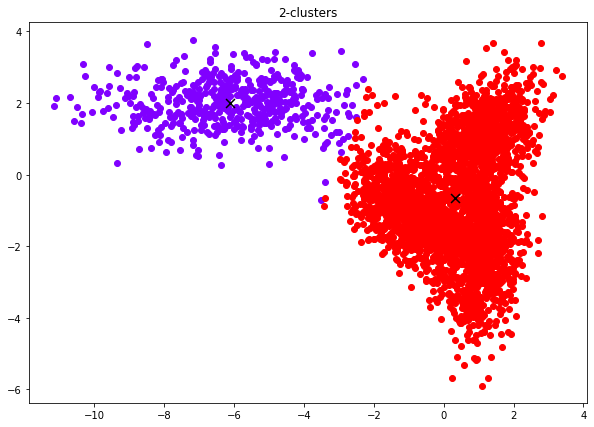

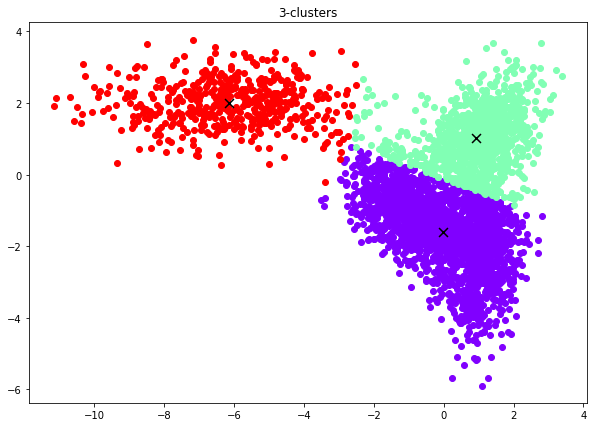

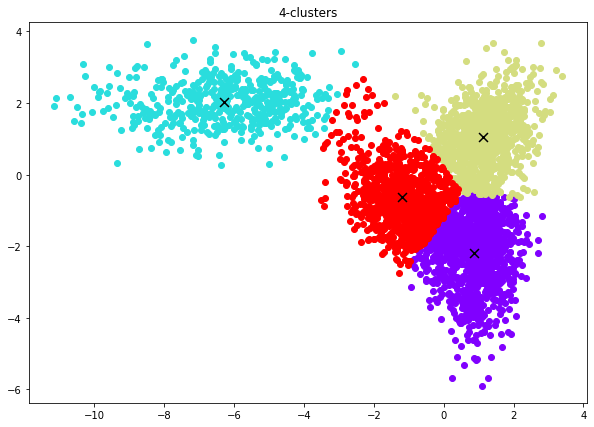

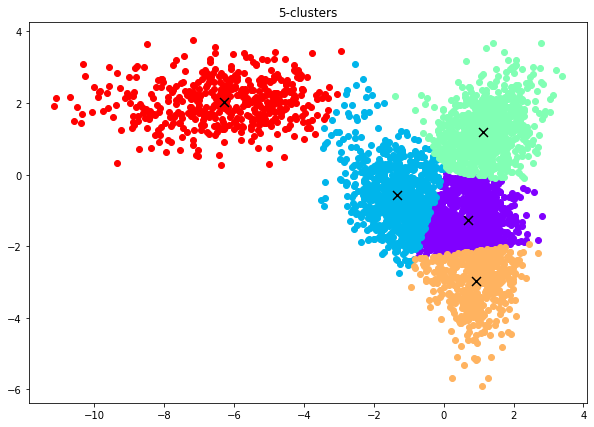

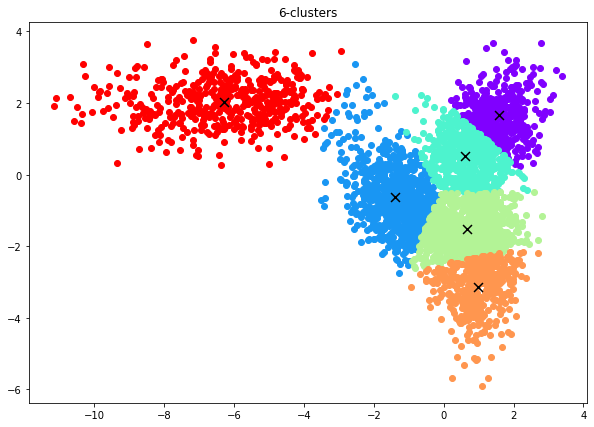

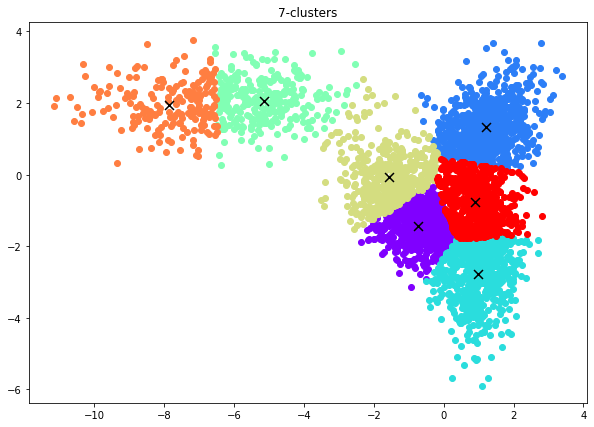

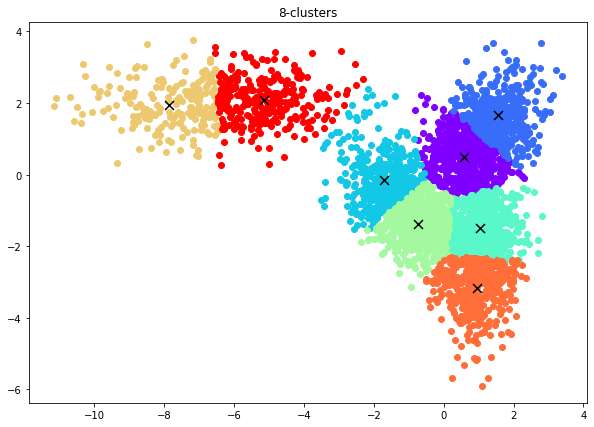

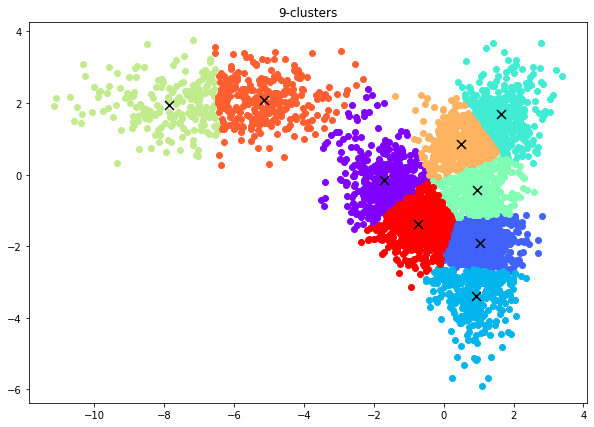

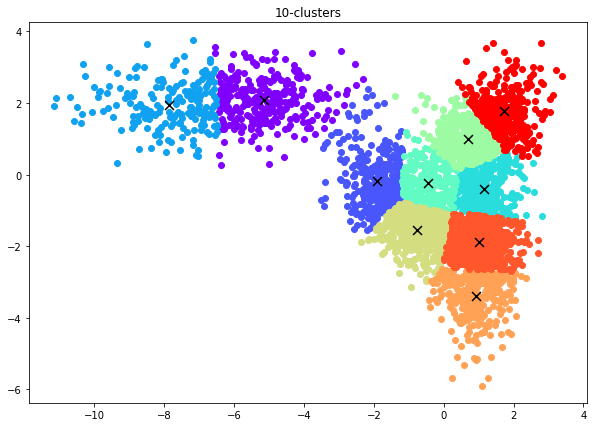

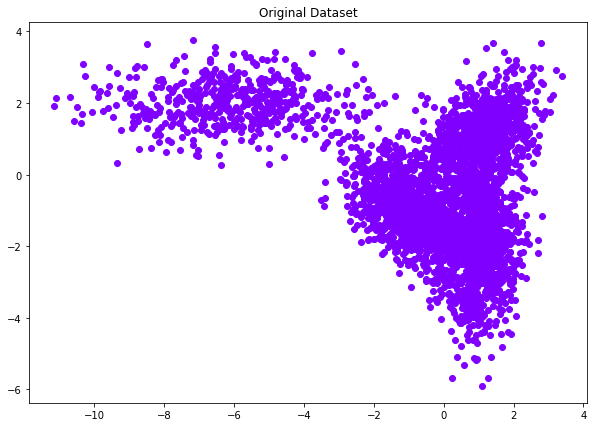

In [12]:
# Task 1
# Dataset 1
# Lloyd's algorithm using Euclidean distance:
# Initialization method uniform random intialization
x = [k for k in range(2, 11)]
y = []
for k in range(2, 11):
    result = executeLloyd(dataset1, k, "uniform random")
    y.append(cost(result[0], result[1]))
    create2DScatter(result[0], result[1])
    plt.title(str(k) + '-clusters')
    plt.savefig('A3/Q1/2D-' + str(k) + '-clusters lloyd\'s' + '.png')
    time.sleep(3)
create2DScatter([dataset1], [])
plt.title("Original Dataset")
plt.savefig('A3/Q1/2D ' + 'original dataset' + '.png')
plt.show()

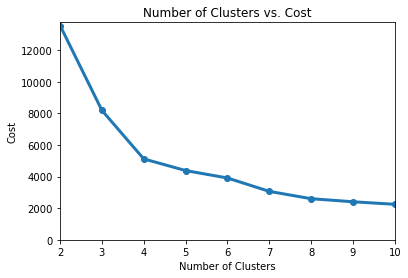

In [13]:
plotGraph(x, y, "A3/Q1/Cost of Clusters, Dataset 1, uniform random.png")

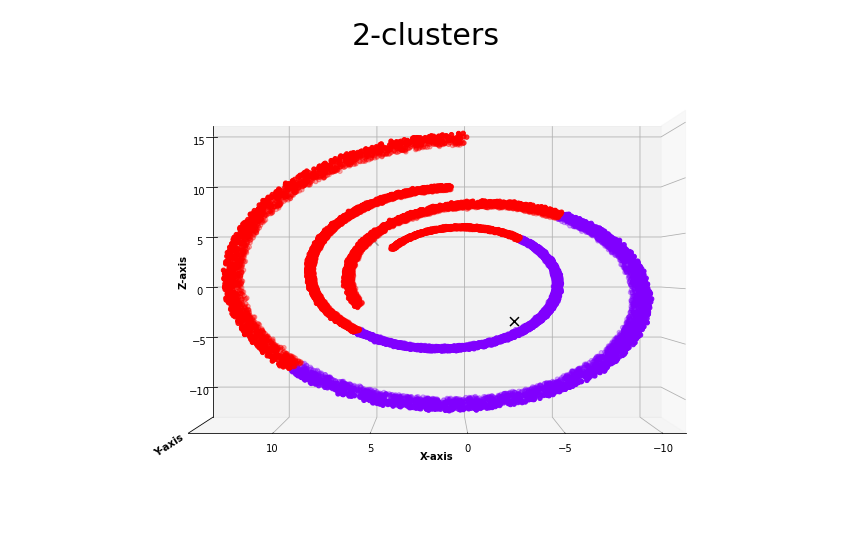

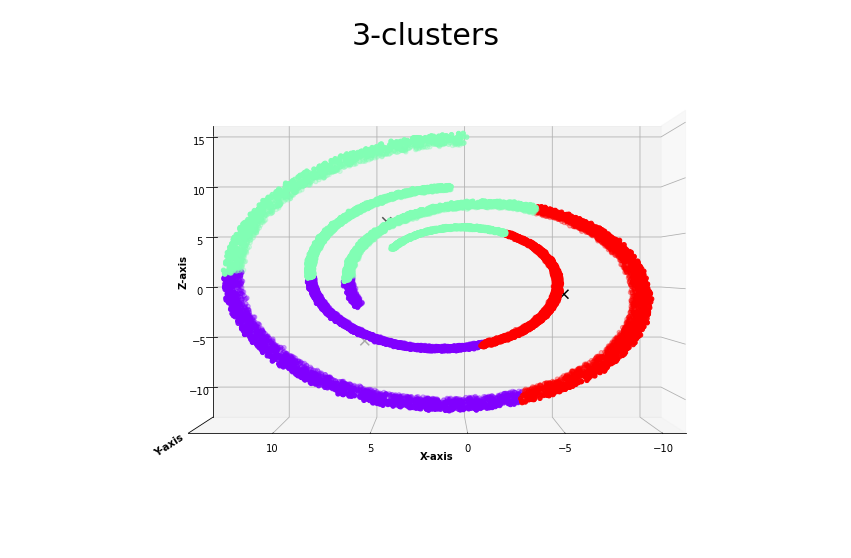

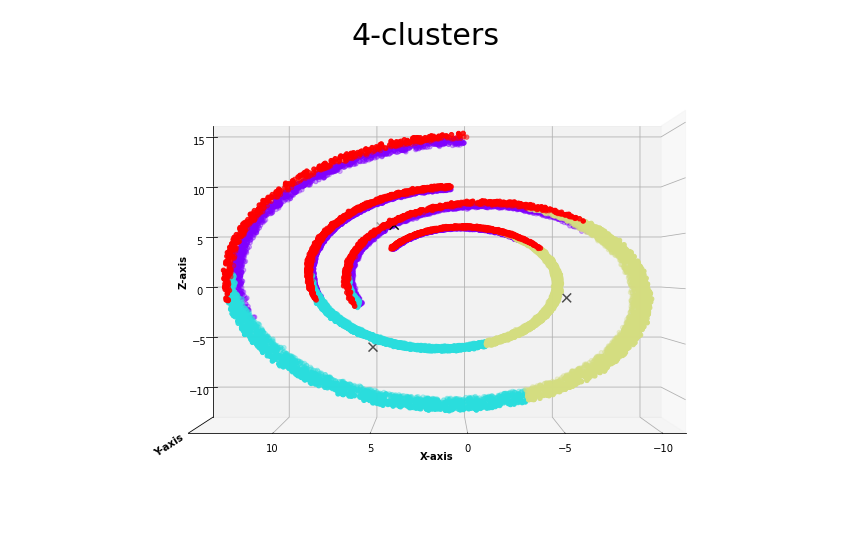

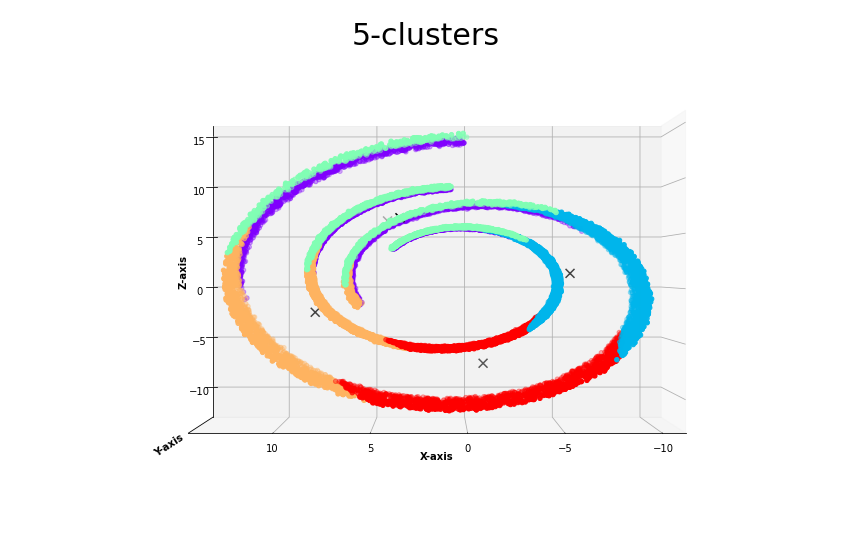

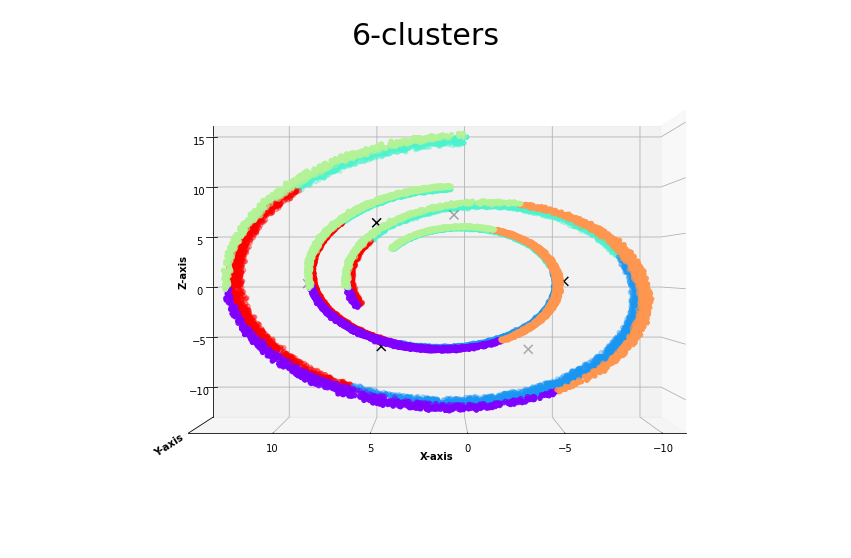

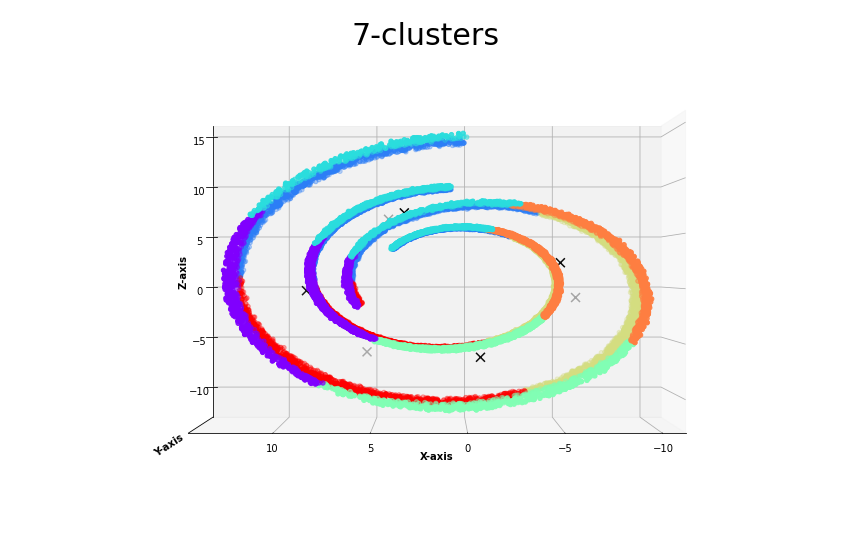

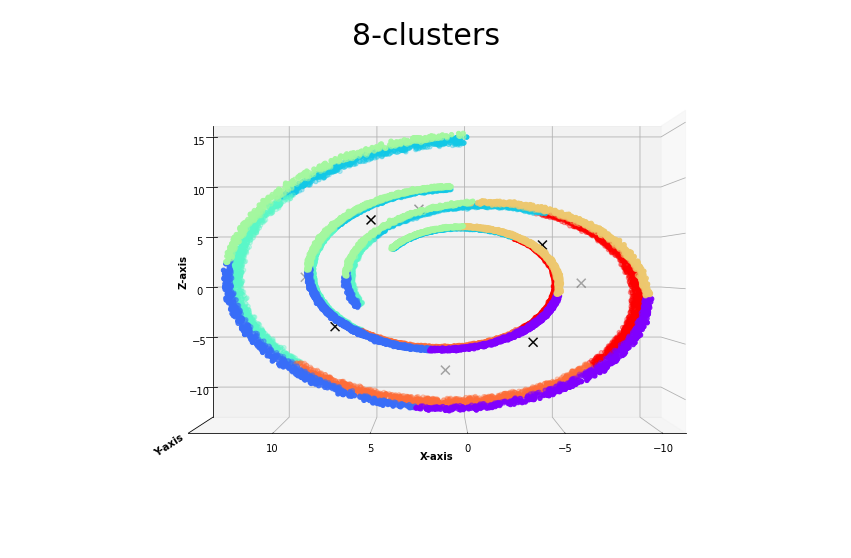

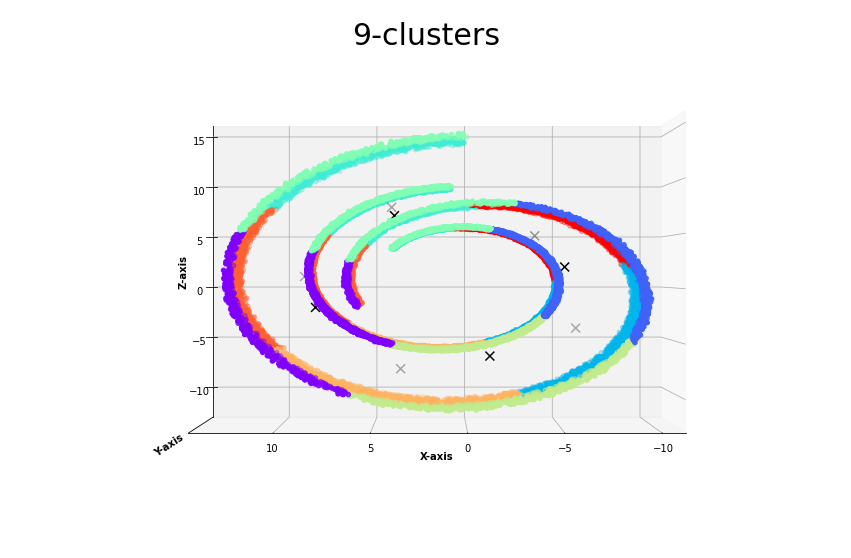

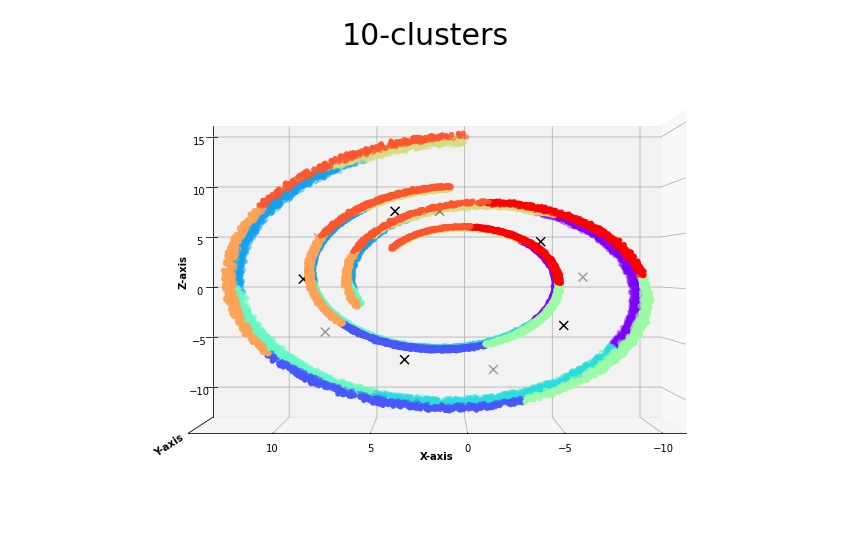

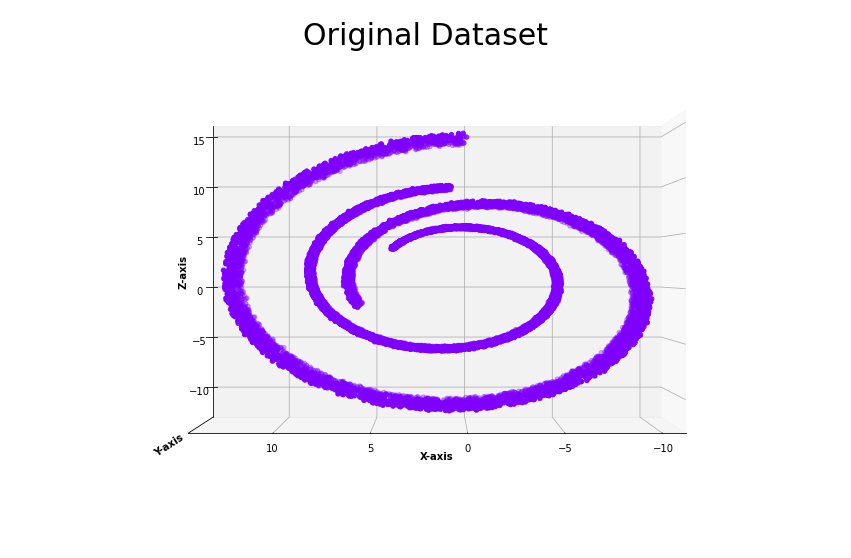

In [22]:
# Task 1
# Dataset 2
# Lloyd's algorithm using Euclidean distance:
# Initialization method uniform random intialization
x = [k for k in range(2, 11)]
y = []
for k in range(2, 11):
    result = executeLloyd(dataset2, k, "uniform random")
    y.append(cost(result[0], result[1]))
    create3DScatter(result[0], result[1])
    plt.title(str(k) + '-clusters', fontsize= 30)
    plt.savefig('A3/Q1/3D-' + str(k) + '-clusters lloyd\'s' + '.png')
    time.sleep(3)
create3DScatter([dataset2], [])
plt.title("Original Dataset", fontsize= 30)
plt.savefig('A3/Q1/3D ' + 'original dataset' + '.png')
plt.show()

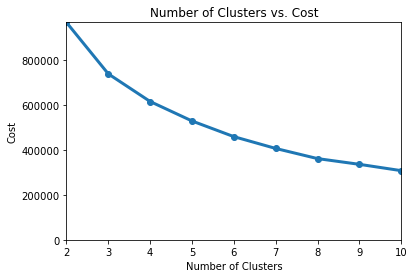

In [23]:
plotGraph(x, y, "A3/Q1/Cost of Clusters, Dataset 2, uniform random.png")

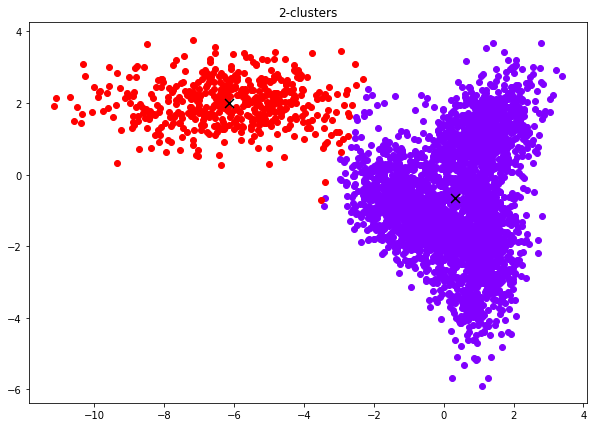

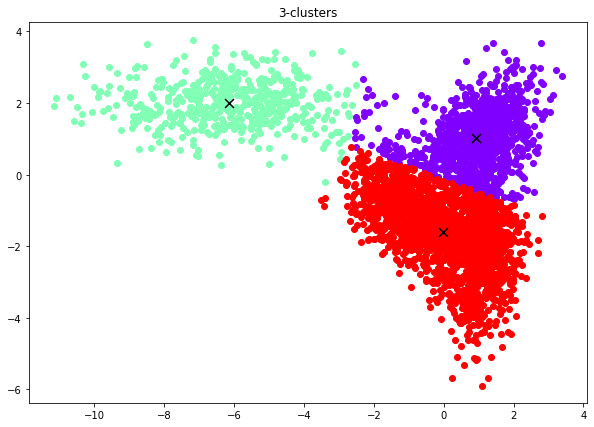

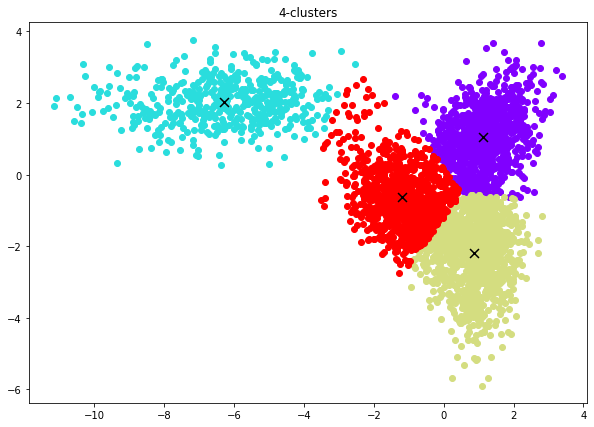

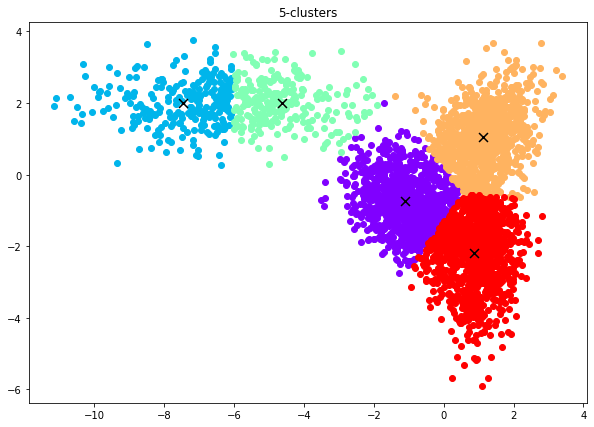

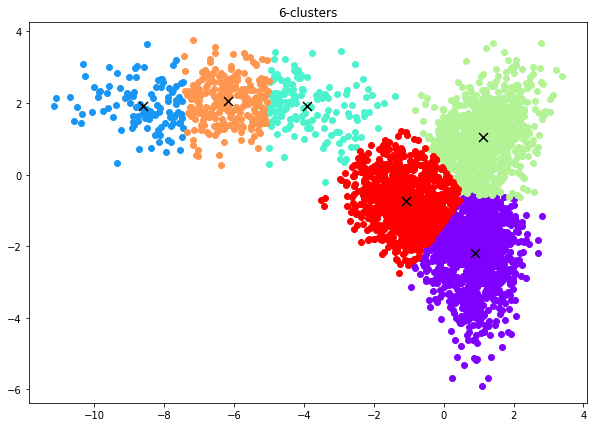

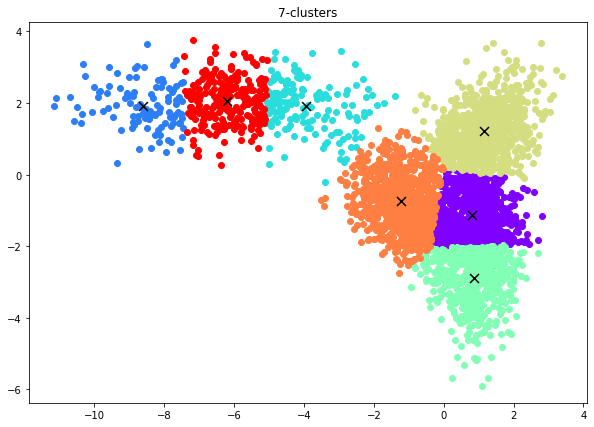

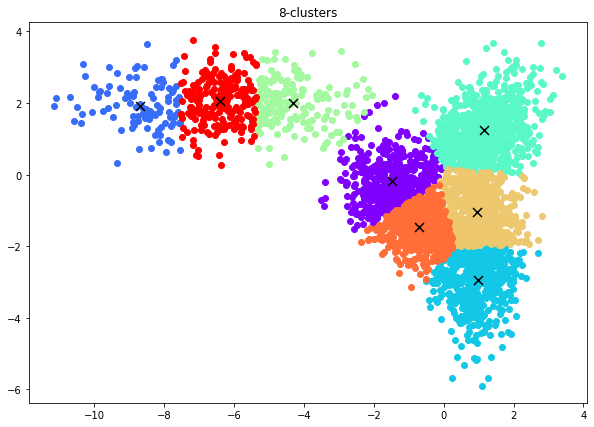

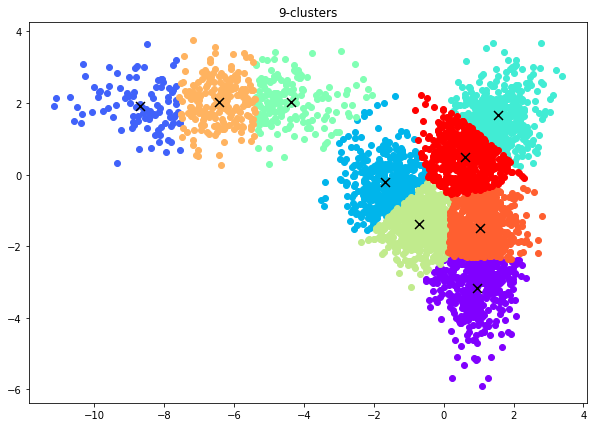

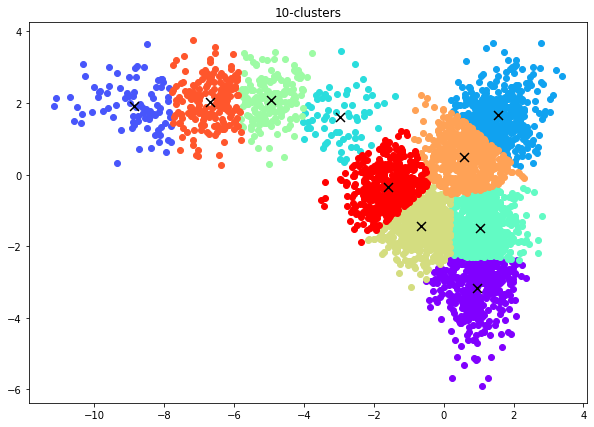

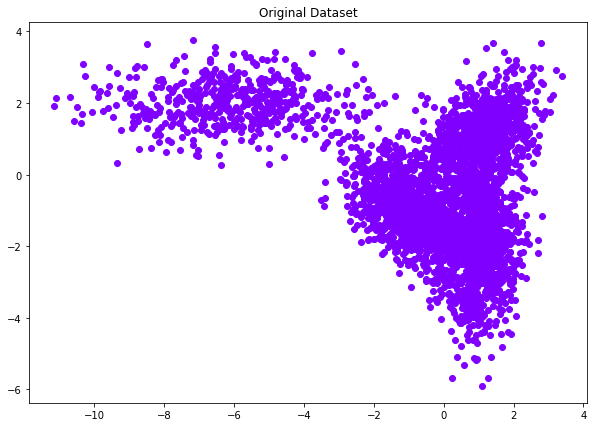

In [24]:
# Task 2
# Dataset 1
# Lloyd's algorithm using Euclidean distance:
# Initialization method K-means++ initialization 
x = [k for k in range(2, 11)]
y = []
for k in range(2, 11):
    result = executeLloyd(dataset1, k, "k-means++")
    y.append(cost(result[0], result[1]))
    create2DScatter(result[0], result[1])
    plt.title(str(k) + '-clusters')
    plt.savefig('A3/Q2/2D-' + str(k) + '-clusters lloyd\'s' + '.png')
    time.sleep(3)
create2DScatter([dataset1], [])
plt.title("Original Dataset")
plt.savefig('A3/Q2/2D ' + 'original dataset' + '.png')
plt.show()

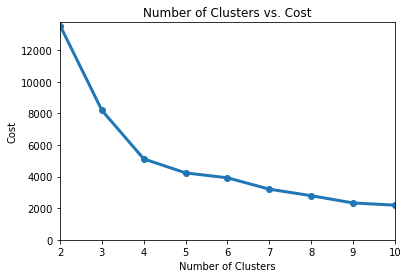

In [25]:
plotGraph(x, y, "A3/Q2/Cost of Clusters, Dataset 1, k-means++.png")

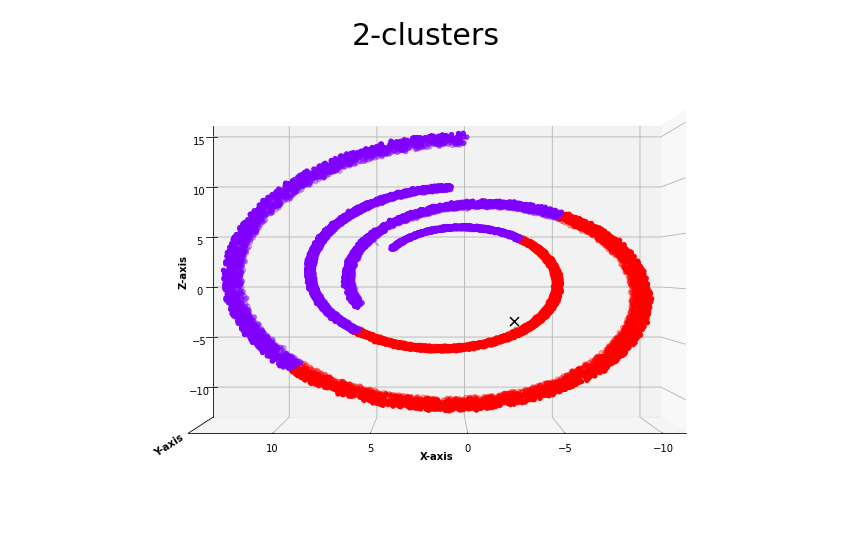

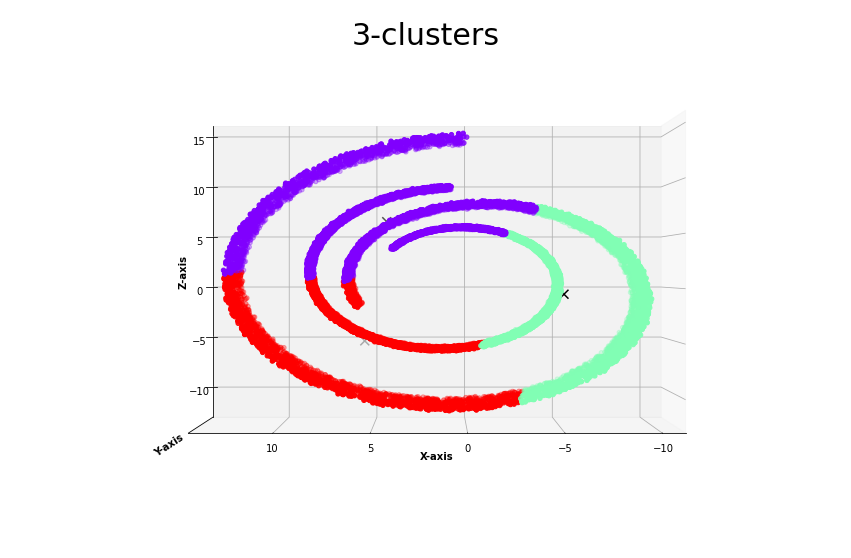

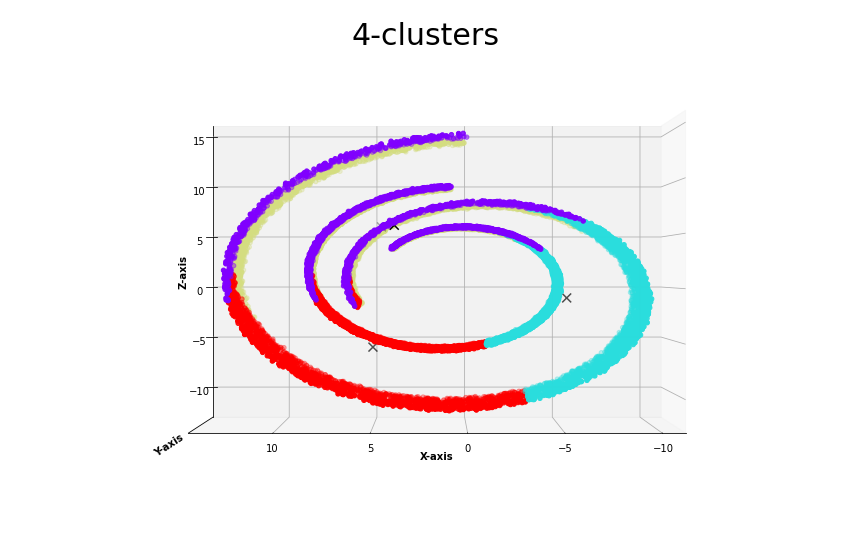

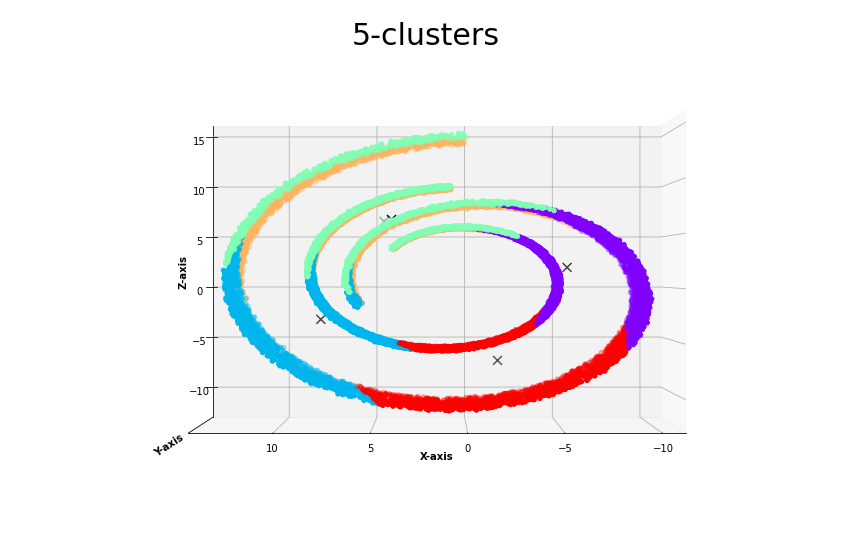

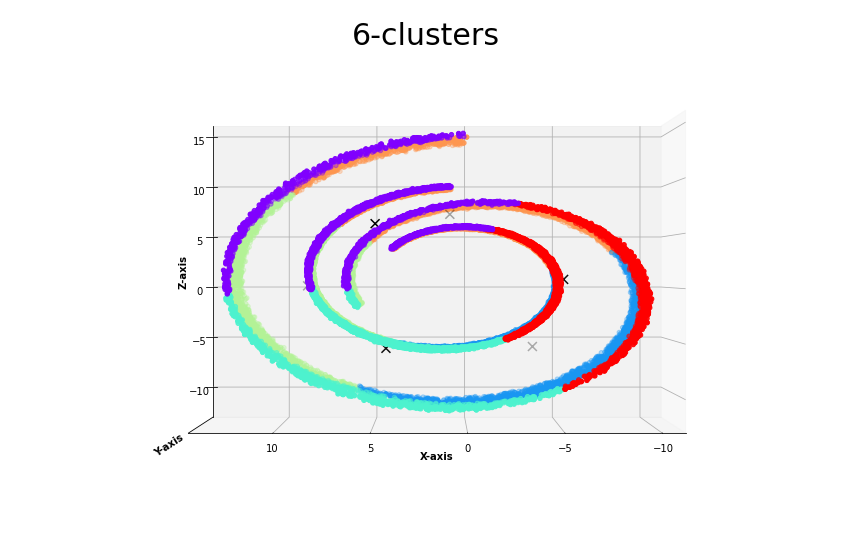

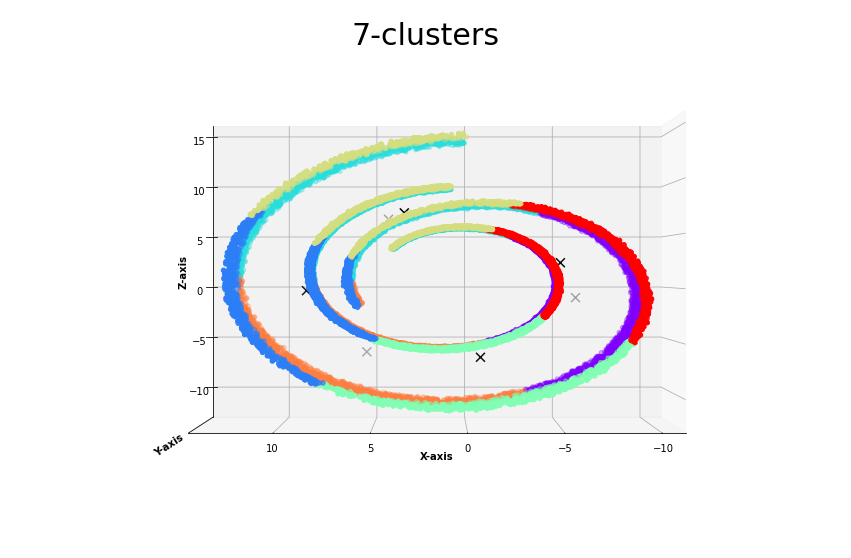

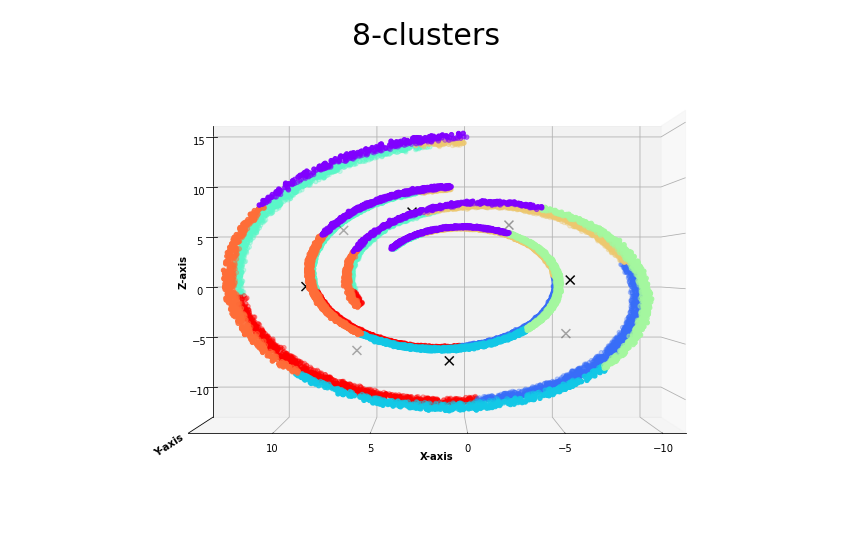

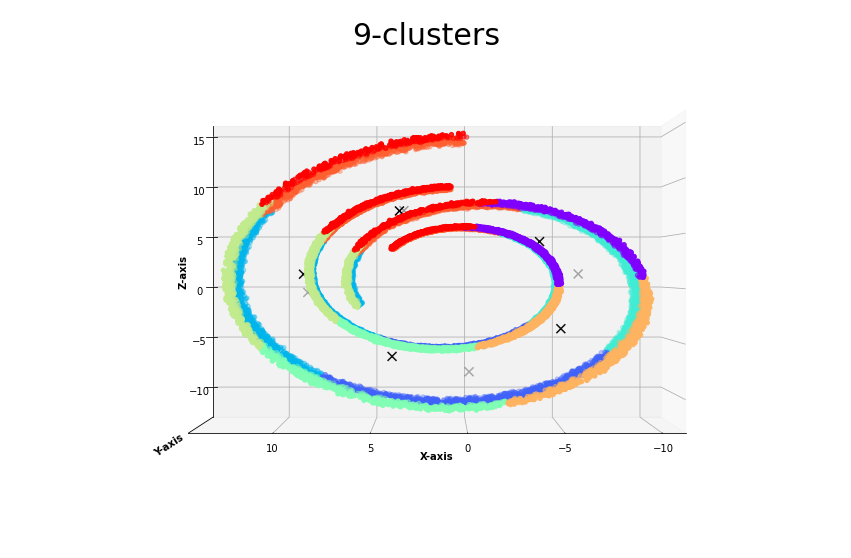

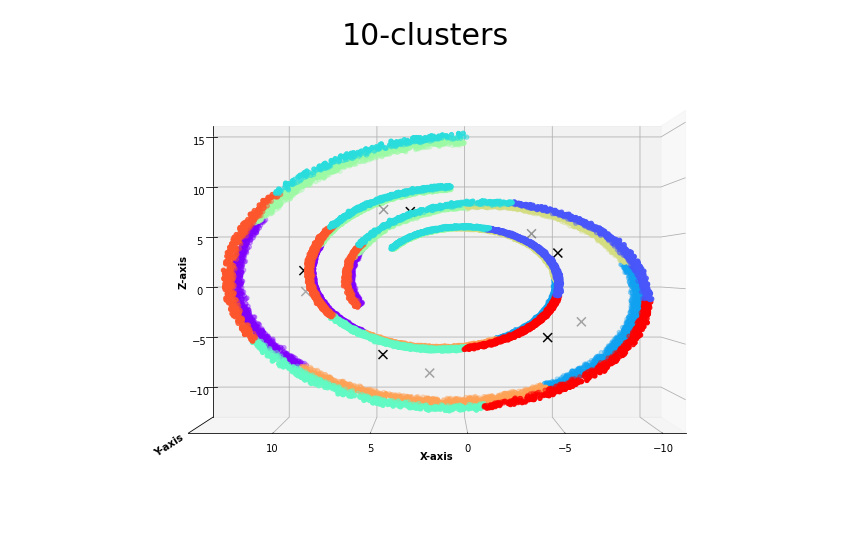

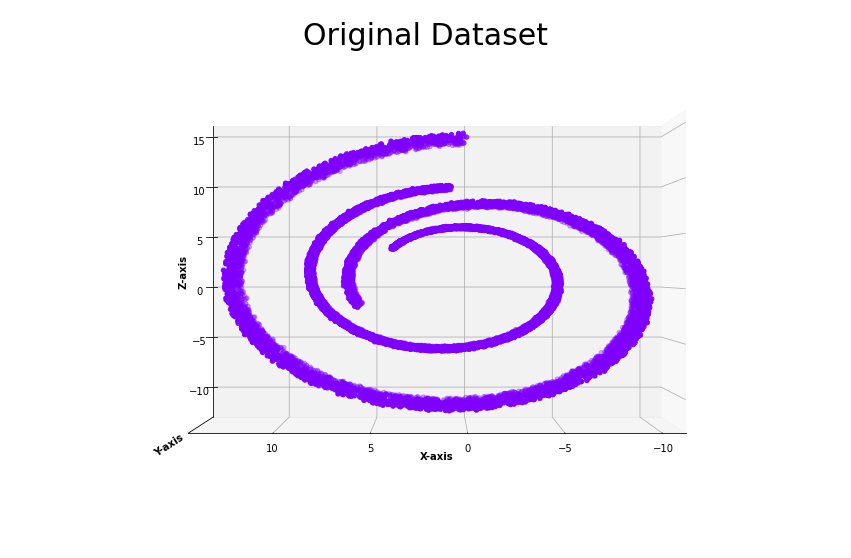

In [26]:
# Task 2
# Dataset 2
# Lloyd's algorithm using Euclidean distance:
# Initialization method K-means++ initialization
x = [k for k in range(2, 11)]
y = []
for k in range(2, 11):
    result = executeLloyd(dataset2, k, "k-means++")
    y.append(cost(result[0], result[1]))
    create3DScatter(result[0], result[1])
    plt.title(str(k) + '-clusters', fontsize= 30)
    plt.savefig('A3/Q2/3D-' + str(k) + '-clusters lloyd\'s' + '.png')
    time.sleep(3)
create3DScatter([dataset2], [])
plt.title("Original Dataset", fontsize= 30)
plt.savefig('A3/Q2/3D ' + 'original dataset' + '.png')
plt.show()

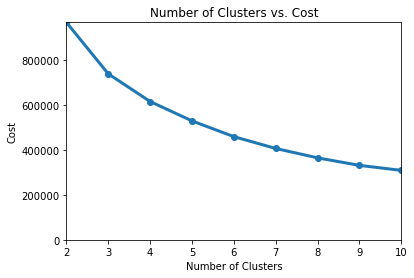

In [27]:
plotGraph(x, y, "A3/Q2/Cost of Clusters, Dataset 2, k-means++.png")

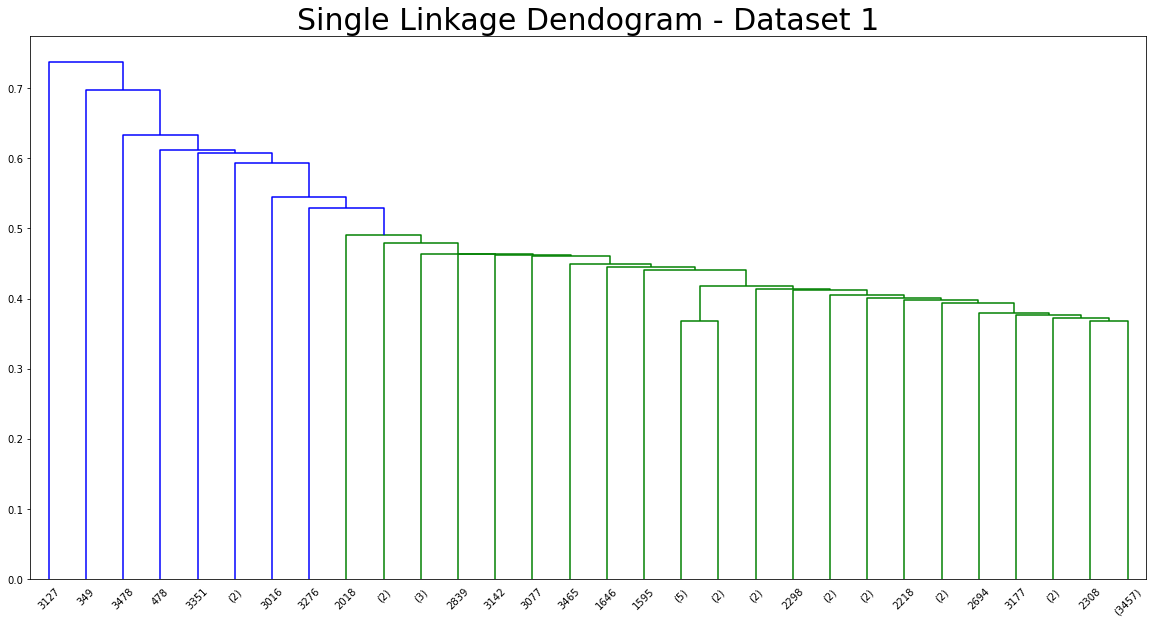

In [14]:
# Task 3
# Dataset 1
# Hierarchical agglomerative clusting using Euclidean distance
# Using single linkage for disimilarity measure 
createDendogram(dataset1, "single", "Single Linkage Dendogram - Dataset 1")
plt.savefig('A3/Q3/Single Linkage Dendogram - Dataset 1.png')

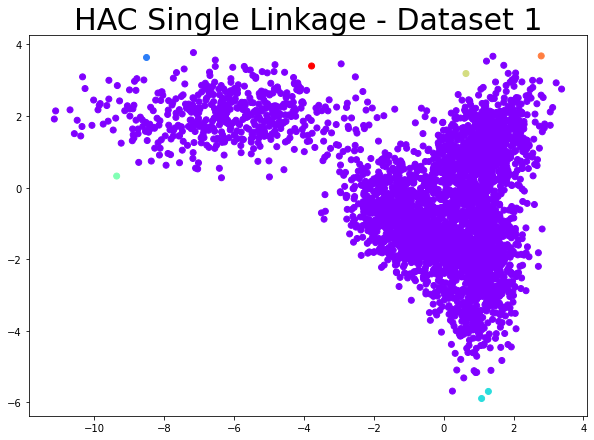

In [24]:
executeHierarchicalAgglomerativeClusting(dataset1, 7, "single", "HAC Single Linkage - Dataset 1")
plt.savefig('A3/Q3/HAC Single Linkage - Dataset 1.png')

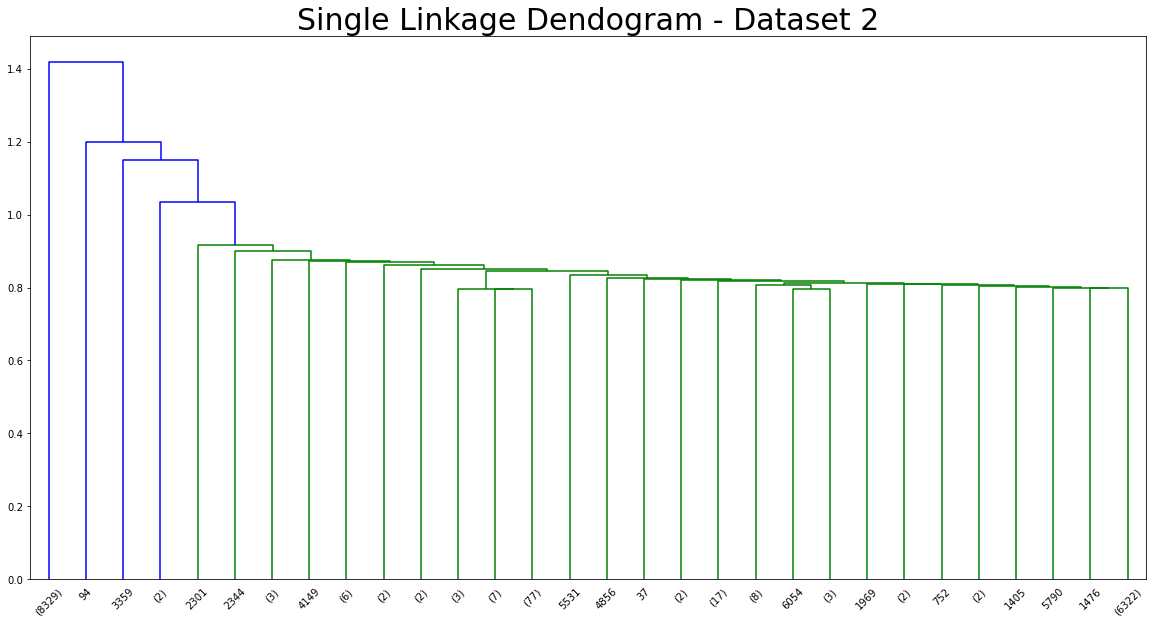

In [16]:
# Task 3
# Dataset 2
# Hierarchical agglomerative clusting using Euclidean distance
# Using single linkage for disimilarity measure 
createDendogram(dataset2, "single", "Single Linkage Dendogram - Dataset 2")
plt.savefig('A3/Q3/Single Linkage Dendogram - Dataset 2.png')

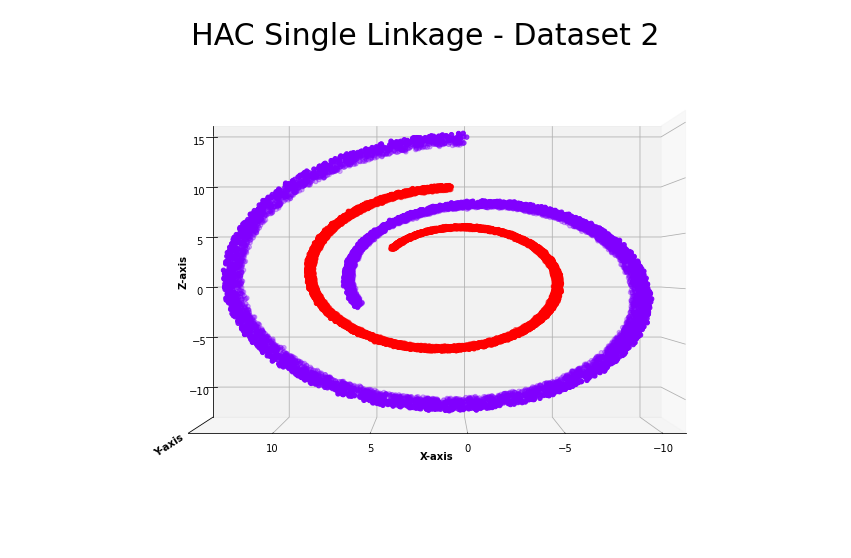

In [12]:
executeHierarchicalAgglomerativeClusting(dataset2, 2, "single", "HAC Single Linkage - Dataset 2", is3D = True)
plt.savefig('A3/Q3/HAC Single Linkage - Dataset 2.png')

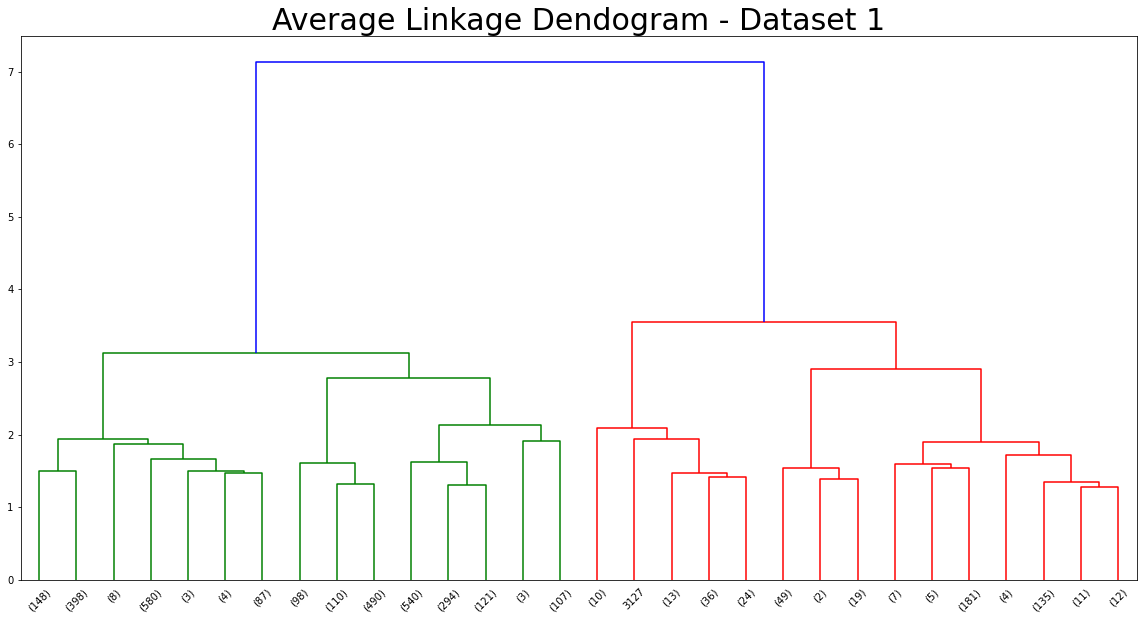

In [18]:
# Task 4
# Dataset 1
# Hierarchical agglomerative clusting using Euclidean distance
# Using average linkage for disimilarity measure 
createDendogram(dataset1, "average", "Average Linkage Dendogram - Dataset 1")
plt.savefig('A3/Q4/Average Linkage Dendogram - Dataset 1.png')

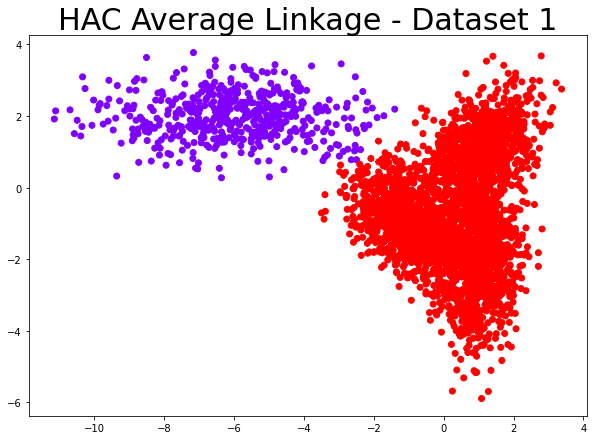

In [25]:
executeHierarchicalAgglomerativeClusting(dataset1, 2, "average", "HAC Average Linkage - Dataset 1")
plt.savefig('A3/Q4/HAC Average Linkage - Dataset 1.png')

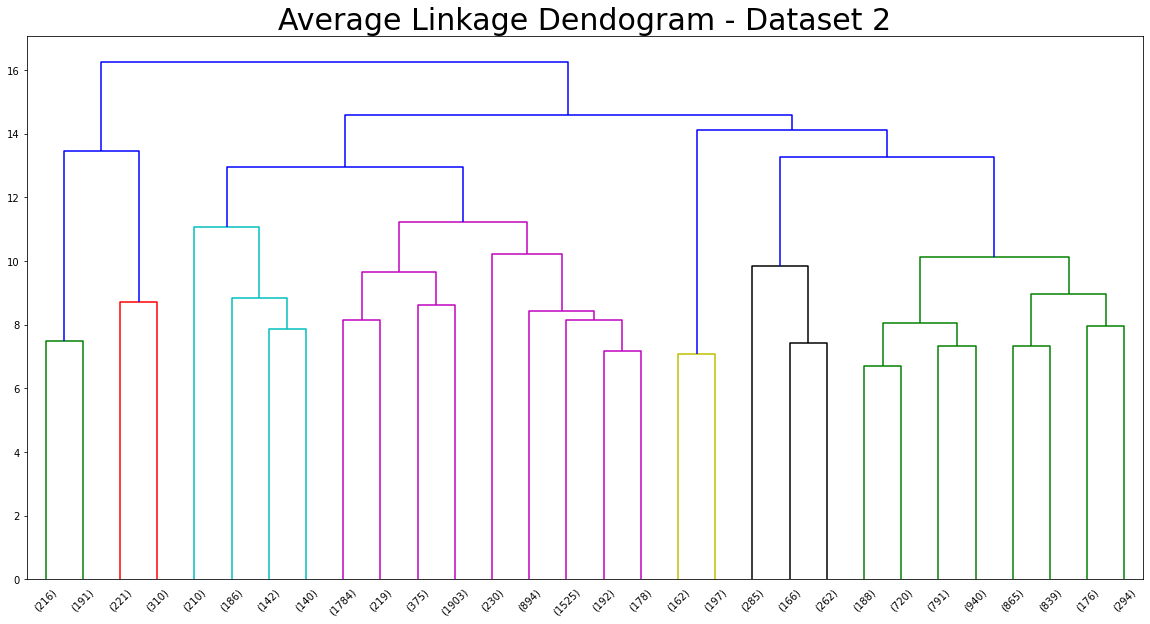

In [20]:
# Task 4
# Dataset 2
# Hierarchical agglomerative clusting using Euclidean distance
# Using average linkage for disimilarity measure 
createDendogram(dataset2, "average", "Average Linkage Dendogram - Dataset 2")
plt.savefig('A3/Q4/Average Linkage Dendogram - Dataset 2.png')

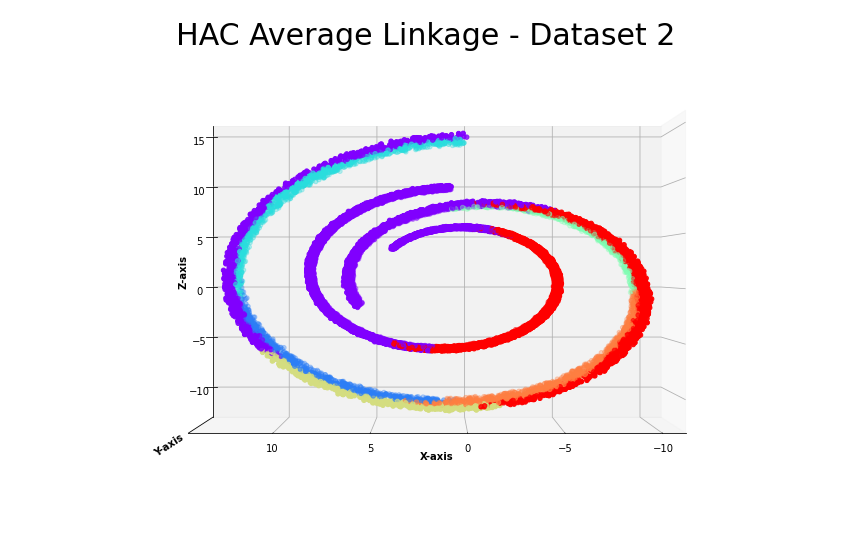

In [28]:
executeHierarchicalAgglomerativeClusting(dataset2, 7, "average", "HAC Average Linkage - Dataset 2", is3D = True)
plt.savefig('A3/Q4/HAC Average Linkage - Dataset 2.png')